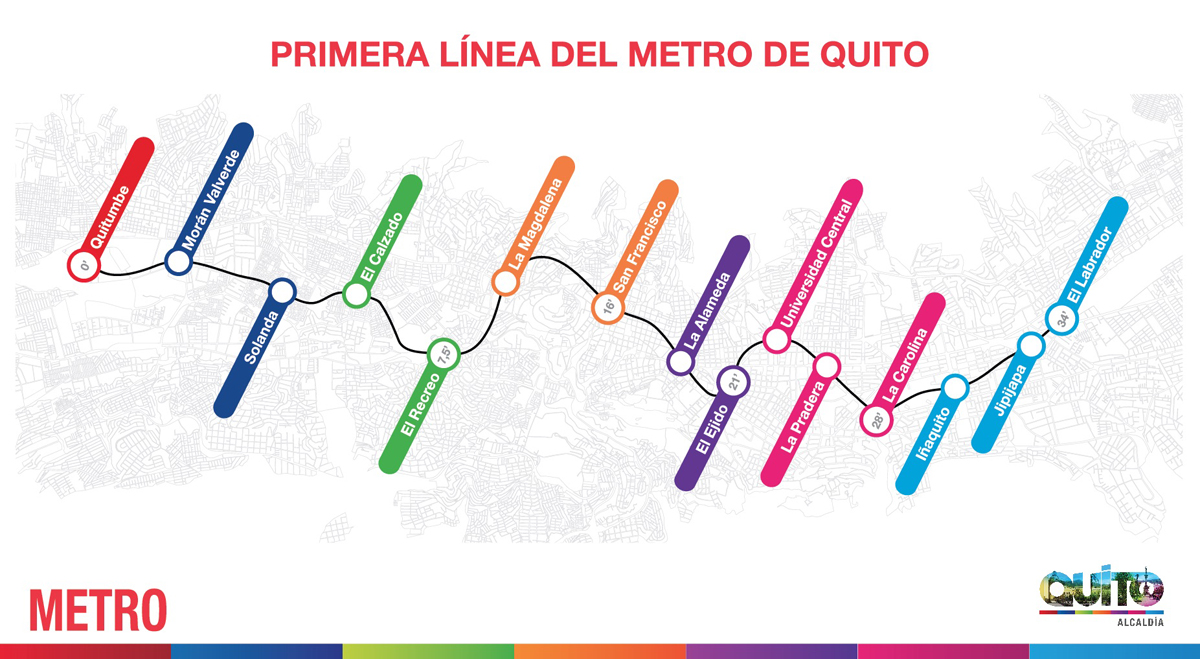

In [7]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Crear un DataFrame con las rutas y tiempos de viaje
data = {
    "Estacion_1": [
        "El Labrador", "Jipijapa", "I\u00f1aquito", "La Carolina", "La Pradera",
        "Universidad Central", "El Ejido", "La Alameda", "San Francisco",
        "La Magdalena", "El Recreo"
    ],
    "Estacion_2": [
        "Jipijapa", "I\u00f1aquito", "La Carolina", "La Pradera", "Universidad Central",
        "El Ejido", "La Alameda", "San Francisco", "La Magdalena",
        "El Recreo", "Quitumbe"
    ],
    "Tiempo": [
        3, 2, 2, 3, 4, 3, 2, 3, 4, 3, 5
    ]
}

rutas_df = pd.DataFrame(data)

# Crear el grafo usando NetworkX
grafo = nx.Graph()
for _, row in rutas_df.iterrows():
    grafo.add_edge(row["Estacion_1"], row["Estacion_2"], weight=row["Tiempo"])

# Posiciones para las estaciones en el gráfico
posiciones = nx.spring_layout(grafo, seed=42)  # Layout automático

# Crear trazas para los nodos y las aristas
nodos_x = []
nodos_y = []
nombres_nodos = []

for nodo, posicion in posiciones.items():
    nodos_x.append(posicion[0])
    nodos_y.append(posicion[1])
    nombres_nodos.append(nodo)

aristas_x = []
aristas_y = []
pesos = []

for edge in grafo.edges(data=True):
    x0, y0 = posiciones[edge[0]]
    x1, y1 = posiciones[edge[1]]
    aristas_x.append(x0)
    aristas_x.append(x1)
    aristas_x.append(None)  # Separador para las líneas
    aristas_y.append(y0)
    aristas_y.append(y1)
    aristas_y.append(None)
    pesos.append(edge[2]["weight"])

# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir aristas
fig.add_trace(go.Scatter(
    x=aristas_x, y=aristas_y,
    mode='lines',
    line=dict(color='gray', width=1),
    hoverinfo='none'
))

# Añadir nodos
fig.add_trace(go.Scatter(
    x=nodos_x, y=nodos_y,
    mode='markers+text',
    marker=dict(size=10, color='blue'),
    text=nombres_nodos,
    textposition='top center',
    hoverinfo='text'
))

# Añadir pesos de las aristas (tiempos de viaje)
for edge, peso in zip(grafo.edges, pesos):
    x0, y0 = posiciones[edge[0]]
    x1, y1 = posiciones[edge[1]]
    peso_x = (x0 + x1) / 2
    peso_y = (y0 + y1) / 2
    fig.add_trace(go.Scatter(
        x=[peso_x], y=[peso_y],
        mode='text',
        text=[str(peso)],
        textfont=dict(color='red', size=12),
        hoverinfo='none'
    ))

# Personalizar el diseño
fig.update_layout(
    title="Grafo del Metro de Quito",
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white"
)

fig.show()


In [8]:
import pandas as pd
import plotly.graph_objects as go

# Coordenadas predefinidas para las estaciones
posiciones = {
    "El Labrador": (0, 7),
    "Jipijapa": (1, 6),
    "Iñaquito": (2, 5),
    "La Carolina": (3, 4),
    "La Pradera": (4, 3),
    "Universidad Central": (5, 2),
    "El Ejido": (6, 1),
    "La Alameda": (7, 0),
    "San Francisco": (6, -1),
    "La Magdalena": (5, -2),
    "El Recreo": (4, -3),
    "El Calzado": (3, -4),
    "Solanda": (2, -5),
    "Morán Valverde": (1, -6),
    "Quitumbe": (0, -7)
}

# Conexiones entre estaciones y colores de las líneas
data = {
    "Estacion_1": [
        "El Labrador", "Jipijapa", "Iñaquito", "La Carolina", "La Pradera",
        "Universidad Central", "El Ejido", "La Alameda", "San Francisco",
        "La Magdalena", "El Recreo", "El Calzado", "Solanda", "Morán Valverde"
    ],
    "Estacion_2": [
        "Jipijapa", "Iñaquito", "La Carolina", "La Pradera", "Universidad Central",
        "El Ejido", "La Alameda", "San Francisco", "La Magdalena", "El Recreo",
        "El Calzado", "Solanda", "Morán Valverde", "Quitumbe"
    ],
    "Color": [
        "#4A90E2", "#4A90E2", "#4A90E2", "#BD10E0", "#BD10E0",
        "#9013FE", "#9013FE", "#50E3C2", "#50E3C2", "#F5A623",
        "#F5A623", "#D0021B", "#D0021B", "#D0021B"
    ]
}

rutas_df = pd.DataFrame(data)

# Crear listas para los trazos de las aristas
aristas_x = []
aristas_y = []
colores_aristas = []

for _, row in rutas_df.iterrows():
    estacion_1 = row["Estacion_1"]
    estacion_2 = row["Estacion_2"]
    color = row["Color"]

    x0, y0 = posiciones[estacion_1]
    x1, y1 = posiciones[estacion_2]

    aristas_x.extend([x0, x1, None])
    aristas_y.extend([y0, y1, None])
    colores_aristas.append(color)

# Crear listas para los nodos
nodos_x = []
nodos_y = []
nombres_nodos = []

for estacion, (x, y) in posiciones.items():
    nodos_x.append(x)
    nodos_y.append(y)
    nombres_nodos.append(estacion)

# Crear el gráfico con Plotly
fig = go.Figure()

# Añadir las aristas (líneas)
for i, color in enumerate(data["Color"]):
    fig.add_trace(go.Scatter(
        x=aristas_x[i * 3:(i + 1) * 3],
        y=aristas_y[i * 3:(i + 1) * 3],
        mode="lines",
        line=dict(color=color, width=4),
        hoverinfo="none"
    ))

# Añadir los nodos
fig.add_trace(go.Scatter(
    x=nodos_x, y=nodos_y,
    mode="markers+text",
    marker=dict(size=10, color="black"),
    text=nombres_nodos,
    textposition="top center",
    hoverinfo="text"
))

# Personalizar el diseño
fig.update_layout(
    title="Mapa de la Primera Línea del Metro de Quito",
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor="white"
)

fig.show()
